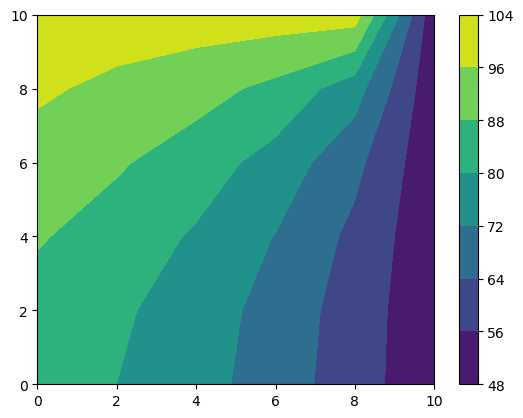

In [13]:
# soluciòn de la ecuaciòn de laplace con condiciones de neumman
import numpy as np 
import matplotlib.pyplot as plt 

# dimensiones 
Lx = 10
Ly = 10
dx = 2
dy = dx
# Material
k = 1

# discretizacion de placa
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)
# creacion de malla
X,Y = np.meshgrid(x,y)
T = np.zeros((len(y),len(x)))
dTdx = np.zeros((len(y),len(x)))
dTdy = np.zeros((len(y),len(x)))

# condiciones de frontera 
# condiciones de dirichlet
T[-1,:] = 100
T[:,-1] = 50
# condiciones de Neumman
qx0 = 0
qy0 = 0
dTdx[:,0] = - qx0/k
dTdy[0,:] = -qy0/k
Tant = np.zeros((len(y),len(x)))
Error = 1
while Error > 0.1:
    Tant = T.copy()
    for i in range(0,len(x)-1):
        for j in range(0,len(y)-1):
            if i == 0 & j == 0:
                T[j,i] = (2*T[j][i+1]-2*dx*dTdx[j][i]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            elif i == 0:
                T[j,i] = (2*T[j][i+1]-2*dx*dTdx[j][i]+T[j+1][i]+T[j-1][i])/4
            elif j == 0:
                T[j,i] = (T[j][i+1]+T[j][i-1]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            else:
                T[j,i]= (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4
    Error = np.max(abs(T-Tant))
plt.contourf(X,Y,T)
plt.colorbar()

array([[ 82.37819675,  79.95664886,  75.00417596,  68.11186936,
         59.58292754,  50.        ],
       [ 84.9539973 ,  81.33232935,  76.06612126,  68.99135485,
         60.13410389,  50.        ],
       [ 88.69304045,  84.47060101,  79.03333922,  71.7140941 ,
         61.98092905,  50.        ],
       [ 92.99244122,  88.90570749,  83.95091434,  76.89356923,
         66.08795385,  50.        ],
       [ 97.12033075,  94.25527493,  91.00998489,  85.84521781,
         75.48329292,  50.        ],
       [100.        , 100.        , 100.        , 100.        ,
        100.        ,  50.        ]])